In [119]:
from defisheye import Defisheye



In [120]:

dtype = 'linear'
format = 'fullframe'
fov = 180
pfov = 120

In [121]:


img = "camera.png"
img_out = f"normal.png"

In [122]:
obj = Defisheye(img, dtype=dtype, format=format, fov=fov, pfov=pfov)

# To save image locally 
obj.convert(outfile=img_out)

# To use the converted image in memory

new_image = obj.convert()

In [123]:
from torchvision.datasets import coco
from pathlib import Path
import torch, torchvision
import numpy as np
import torchvision.datasets as dset
import torchvision.transforms as transforms
from IPython.display import display
from PIL import Image, ImageDraw
from ultralytics import YOLO
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [124]:
dataset_path = Path('data')
train_images, train_ann = f"{dataset_path}/train/images", f"{dataset_path}/train/train.json"
test_images, test_ann = f"{dataset_path}/test/images", f"{dataset_path}/test/test.json"

In [125]:
train_dataset = coco.CocoDetection(train_images, annFile=train_ann)
test_dataset = coco.CocoDetection(test_images, annFile=test_ann)
# cap = dset.CocoCaptions(root = train_images, annFile = train_ann, transform=transforms.PILToTensor())


loading annotations into memory...
Done (t=0.41s)
creating index...
index created!
loading annotations into memory...
Done (t=0.16s)
creating index...
index created!


In [139]:

img, labels = train_dataset[0]

print("Image Size: ", img)
print(labels)


Image Size:  <PIL.Image.Image image mode=RGB size=1225x1088 at 0x7B7F36307BF0>
[{'id': 27700, 'image_id': 310, 'category_id': 1, 'bbox': [145, 343, 74, 108], 'area': 7992, 'iscrowd': 0}, {'id': 27701, 'image_id': 310, 'category_id': 1, 'bbox': [684, 295, 55, 51], 'area': 2805, 'iscrowd': 0}, {'id': 27702, 'image_id': 310, 'category_id': 1, 'bbox': [561, 676, 128, 150], 'area': 19200, 'iscrowd': 0}, {'id': 27703, 'image_id': 310, 'category_id': 1, 'bbox': [803, 416, 66, 64], 'area': 4224, 'iscrowd': 0}, {'id': 27704, 'image_id': 310, 'category_id': 1, 'bbox': [996, 682, 61, 56], 'area': 3416, 'iscrowd': 0}, {'id': 27705, 'image_id': 310, 'category_id': 1, 'bbox': [1057, 743, 43, 39], 'area': 1677, 'iscrowd': 0}, {'id': 27706, 'image_id': 310, 'category_id': 2, 'bbox': [380, 173, 62, 37], 'area': 2294, 'iscrowd': 0}, {'id': 27707, 'image_id': 310, 'category_id': 2, 'bbox': [410, 139, 56, 30], 'area': 1680, 'iscrowd': 0}, {'id': 27708, 'image_id': 310, 'category_id': 2, 'bbox': [934, 450,

In [ ]:
# coco_detection = coco.CocoDetection()
# train_dataset.coco.annToMask()?
draw_image = img.copy()
draw = ImageDraw.Draw(draw_image)
colors = [
        "red", "green", "blue", "purple", "orange", "cyan", "magenta", "yellow", "lime", "pink"
    ]
classes = ["Bus", "Bike", "Car", "Pedestrian", "Truck"]
# a = target[0]
# print('A: ', a)
for label in labels:
    print(f"label: {label}")
    bbox = label['bbox']
    class_name = classes[label['category_id']]
    color = colors[label['category_id'] % len(colors)]
    text = f"{class_name}"
    draw.text((bbox[0], bbox[1] - 10), text, fill=color)
    
    draw.rectangle((bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]), outline=color)
display(draw_image)


label: {'id': 27700, 'image_id': 310, 'category_id': 1, 'bbox': [145, 343, 74, 108], 'area': 7992, 'iscrowd': 0}


KeyError: 'score'

In [128]:
# model = torch.hub.load("ultralytics/yolov8", "yolov8s")
model = YOLO("yolov8m.pt", task='detect')
# model.to(device)


In [129]:

results = model(img, device=device)  # batch of images
print(f"results: {results}")
# results.print()
# results.show() 


0: 576x640 10 cars, 1 motorcycle, 1 boat, 17.6ms
Speed: 6.2ms preprocess, 17.6ms inference, 2.6ms postprocess per image at shape (1, 3, 576, 640)
results: [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 4

In [130]:
def draw_bounding_box_yolo(results):
    images = []
    colors = [
        "red", "green", "blue", "purple", "orange", "cyan", "magenta", "yellow", "lime", "pink"
    ]
    for i in range(len(results)):
        result = results[i]
        image = Image.fromarray(results[0].orig_img)

        draw = ImageDraw.Draw(image)

        boxes = result.boxes.xyxy.cpu().numpy()
        scores = result.boxes.conf.cpu().numpy()
        class_ids = result.boxes.cls.cpu().numpy()
        names = result.names 

        for i in range(len(boxes)):
            x1, y1, x2, y2 = boxes[i]
            
            score = scores[i]
            class_id = int(class_ids[i])
            class_name = names[class_id]
            color = colors[class_id % len(colors)]
            draw.rectangle((x1, y1, x2, y2), outline=color)
            text = f"{class_name} {score:.2f}"
            draw.text((x1, y1 - 10), text, fill=color)
            
            print(f"  Object {i+1}:")
            print(f"    Class: {class_name} (ID: {class_id})")
            print(f"    Confidence: {score:.2f}")
            print(f"    Bounding Box: [x1={x1:.0f}, y1={y1:.0f}, x2={x2:.0f}, y2={y2:.0f}]")
            images.append(image)
    return images

  Object 1:
    Class: car (ID: 2)
    Confidence: 0.85
    Bounding Box: [x1=484, y1=200, x2=558, y2=241]
  Object 2:
    Class: car (ID: 2)
    Confidence: 0.78
    Bounding Box: [x1=568, y1=681, x2=679, y2=812]
  Object 3:
    Class: car (ID: 2)
    Confidence: 0.68
    Bounding Box: [x1=384, y1=178, x2=440, y2=208]
  Object 4:
    Class: motorcycle (ID: 3)
    Confidence: 0.52
    Bounding Box: [x1=364, y1=207, x2=407, y2=244]
  Object 5:
    Class: car (ID: 2)
    Confidence: 0.47
    Bounding Box: [x1=478, y1=163, x2=535, y2=191]
  Object 6:
    Class: car (ID: 2)
    Confidence: 0.41
    Bounding Box: [x1=317, y1=167, x2=368, y2=202]
  Object 7:
    Class: car (ID: 2)
    Confidence: 0.31
    Bounding Box: [x1=938, y1=455, x2=1001, y2=532]
  Object 8:
    Class: car (ID: 2)
    Confidence: 0.29
    Bounding Box: [x1=801, y1=408, x2=869, y2=480]
  Object 9:
    Class: person (ID: 0)
    Confidence: 0.28
    Bounding Box: [x1=278, y1=805, x2=431, y2=983]
  Object 10:
    Class: mo

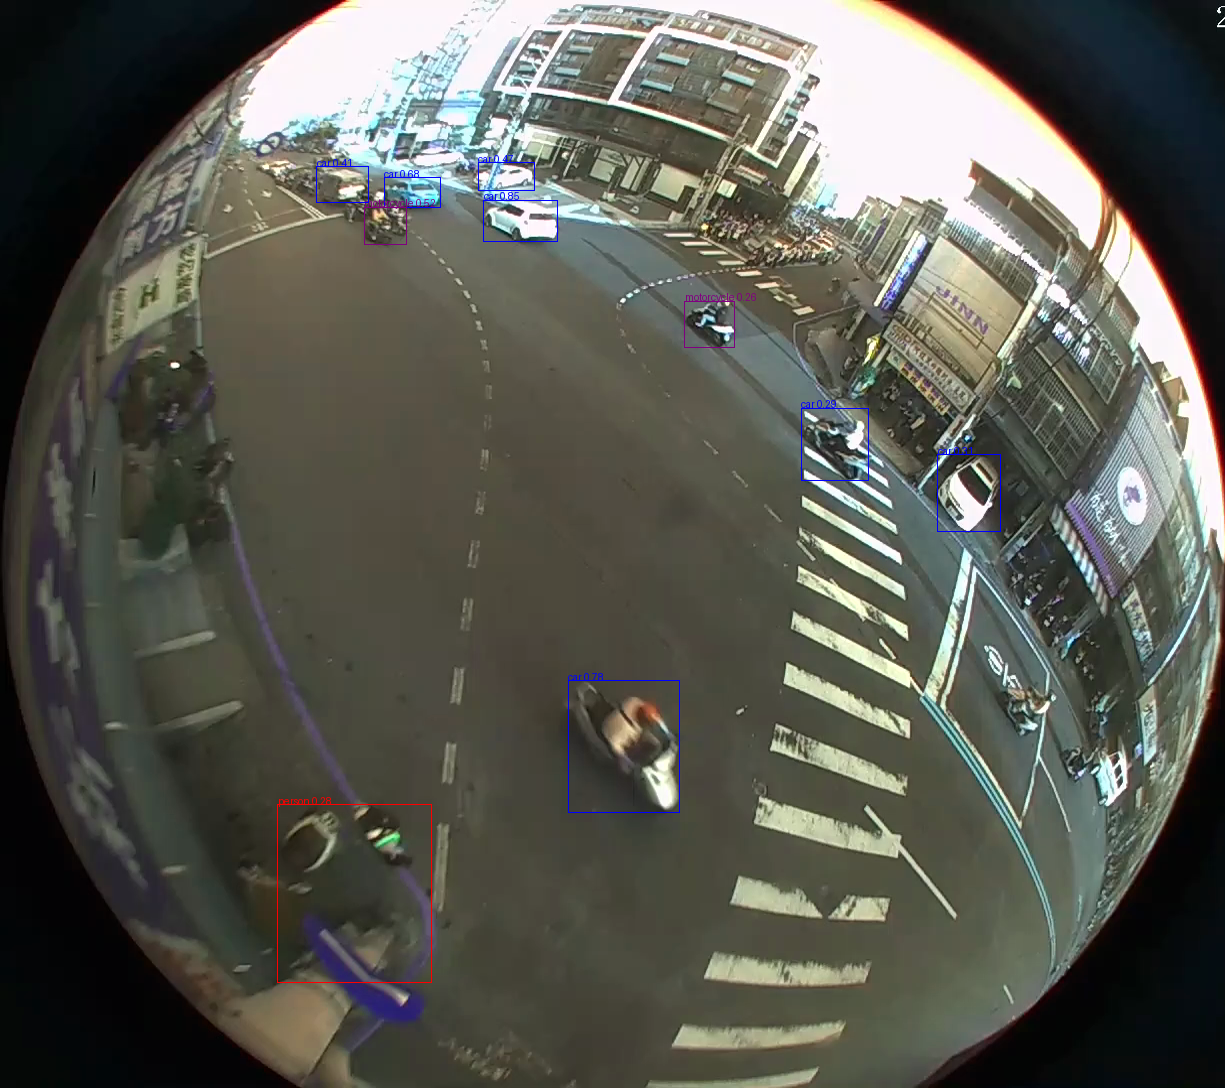

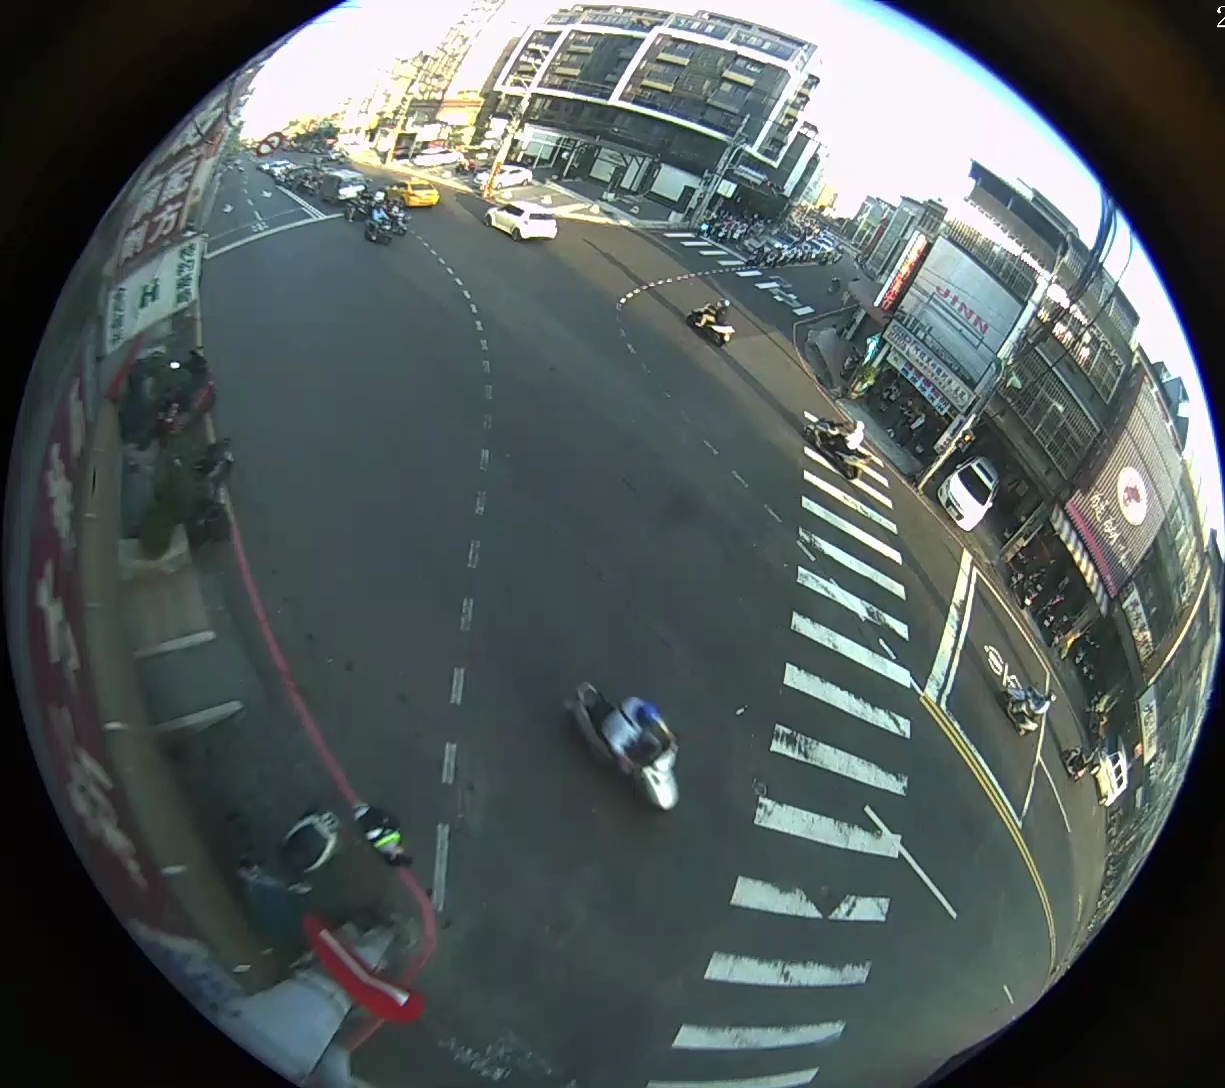

In [142]:
images = draw_bounding_box_yolo(results)
display(images[0], draw_image)

In [135]:
model = YOLO("yolo11m.pt", task='detect')


In [136]:

results = model(img, device=device)  # batch of images
print(f"results: {results}")
# results.print()
# results.show() 


0: 576x640 1 person, 7 cars, 2 motorcycles, 18.8ms
Speed: 5.6ms preprocess, 18.8ms inference, 2.6ms postprocess per image at shape (1, 3, 576, 640)
results: [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple',

  Object 1:
    Class: car (ID: 2)
    Confidence: 0.85
    Bounding Box: [x1=484, y1=200, x2=558, y2=241]
  Object 2:
    Class: car (ID: 2)
    Confidence: 0.78
    Bounding Box: [x1=568, y1=681, x2=679, y2=812]
  Object 3:
    Class: car (ID: 2)
    Confidence: 0.68
    Bounding Box: [x1=384, y1=178, x2=440, y2=208]
  Object 4:
    Class: motorcycle (ID: 3)
    Confidence: 0.52
    Bounding Box: [x1=364, y1=207, x2=407, y2=244]
  Object 5:
    Class: car (ID: 2)
    Confidence: 0.47
    Bounding Box: [x1=478, y1=163, x2=535, y2=191]
  Object 6:
    Class: car (ID: 2)
    Confidence: 0.41
    Bounding Box: [x1=317, y1=167, x2=368, y2=202]
  Object 7:
    Class: car (ID: 2)
    Confidence: 0.31
    Bounding Box: [x1=938, y1=455, x2=1001, y2=532]
  Object 8:
    Class: car (ID: 2)
    Confidence: 0.29
    Bounding Box: [x1=801, y1=408, x2=869, y2=480]
  Object 9:
    Class: person (ID: 0)
    Confidence: 0.28
    Bounding Box: [x1=278, y1=805, x2=431, y2=983]
  Object 10:
    Class: mo

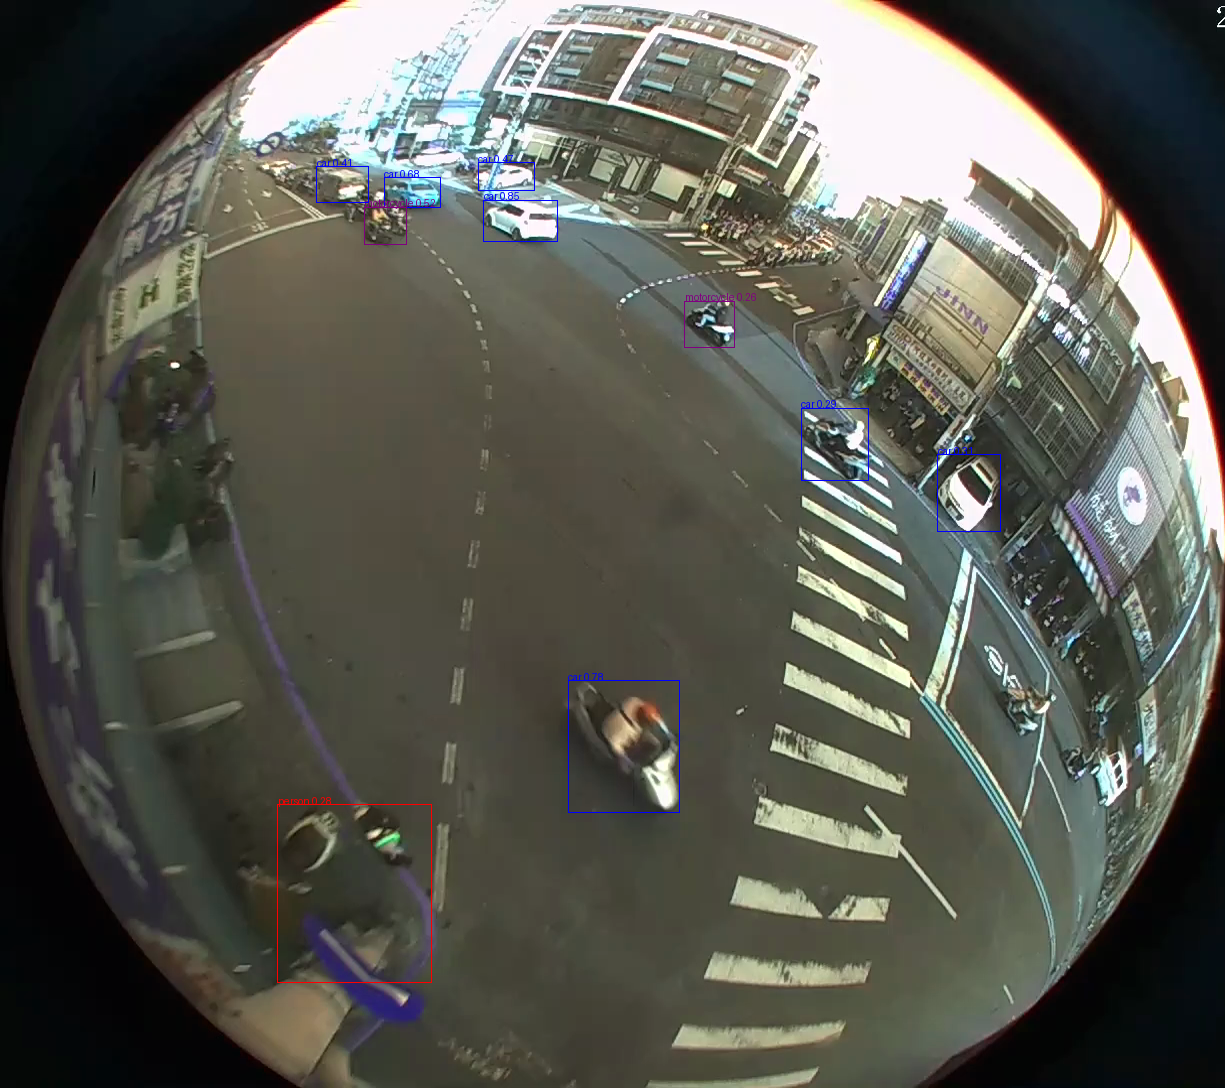

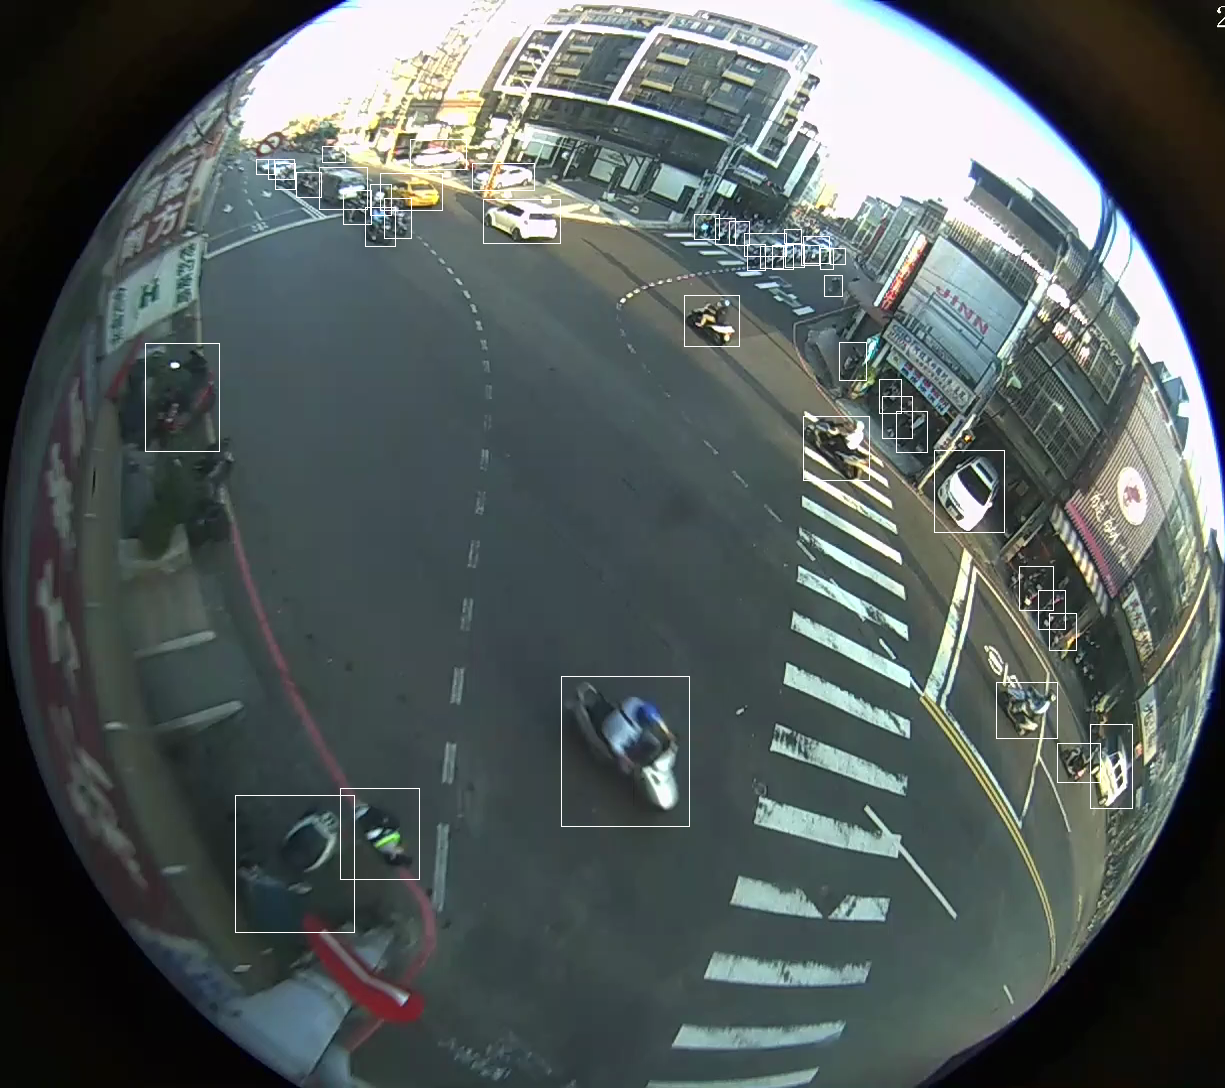

In [137]:
images = draw_bounding_box_yolo(results)
display(images[0], draw_image)